![image](./images/blob.jpg)

## What is a Blob?

A Blob is a group of connected pixels in an image that share some common property (E.g, grayscale value). In the image above, the dark connected regions are blobs, and blob detection aims to identify and mark these regions.

## SimpleBlobDetector Example

OpenCV provides a convenient way to detect and filter blobs based on different characteristics. Let’s start with the simplest example

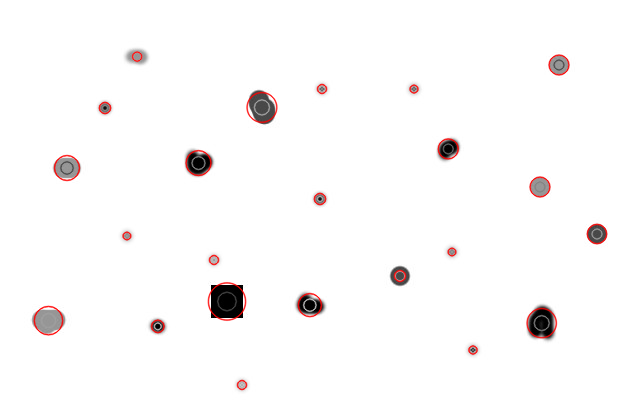

In [5]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

# Read image (make sure the path is correct)
im = cv2.imread("./images/blob.jpg", cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded properly
if im is None:
    print("Error: Image not loaded. Check the image path.")
else:
    # Set up the detector with default parameters.
    detector = cv2.SimpleBlobDetector_create()

    # Detect blobs.
    keypoints = detector.detect(im)

    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
    im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Show keypoints
    cv2_imshow(im_with_keypoints)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## How Does Blob Detection Work?

SimpleBlobDetector, as the name implies, is based on a rather simple algorithm described below. The algorithm is controlled by parameters ( shown in bold below )  and has the following steps. Scroll down to learn how the parameters are set.

1. `Thresholding`: Convert the source images to several binary images by thresholding the source image with thresholds starting at minThreshold. These thresholds are incremented  by thresholdStep until maxThreshold. So the first threshold is minThreshold, the second is minThreshold + thresholdStep, the third is minThreshold + 2 x thresholdStep, and so on.

2. `Grouping`: In each binary image,  connected white pixels are grouped.  Let’s call these binary blobs.

3. `Merging`: The centers of the binary blobs in the binary images are computed, and blobs located closer than minDistBetweenBlobs are merged.

4. `Center & Radius Calculation`:  The centers and radii of the newly merged blobs are computed and returned.


## Filtering Blobs by Color, Size, and Shape
The parameters for SimpleBlobDetector can be set to filter the type of blobs we want.

### 1. By Color : [ Note: This feature appears broken. I checked the code, and it appears to have a logical error ]

First, you need to set filterByColor = 1. Set blobColor = 0 to select darker blobs, and blobColor = 255 for lighter blobs. By Size :  You can filter the blobs based on size by setting the parameters filterByArea = 1, and appropriate values for minArea  and maxArea. E.g.  setting minArea = 100 will filter out all the blobs that have less then 100 pixels.By Shape : Now shape has three different parameters.

### 2. Circularity :  

This just measures how close to a circle the blob is. E.g. a regular hexagon has higher circularity than, say a square. To filter by circularity, set filterByCircularity = 1.  Then set appropriate values for minCircularity and maxCircularity.  Circularity is defined as

$$\frac{4*\pi*Area}{perimeter * perimeter}$$   This means that a circle has a circularity of 1, the circularity of a square is 0.785, and so on.

### 3. Convexity :

 A picture is worth a thousand words.  Convexity is defined as the (Area of the Blob / Area of it’s convex hull). Now, Convex Hull of a shape is the tightest convex shape that completely encloses the shape.  To filter by convexity, set filterByConvexity = 1, followed by setting 0 ≤ minConvexity ≤ 1and maxConvexity ( ≤ 1)


### 4. Inertia Ratio :
Don’t let this scare you. Mathematicians often use confusing words to describe something very simple. All you have to know is that this measures how elongated a shape is. E.g. for a circle, this value is 1, for an ellipse it is between 0 and 1, and for a line it is 0. To filter by inertia ratio, set filterByInertia = 1, and set 0 ≤ minInertiaRatio ≤ 1and maxInertiaRatio (≤ 1 )appropriately.

## How to set SimpleBlobDetector params?

Setting parameters for SimpleBlobDetector is easy. Here is an example

In [6]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;

# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
  detector = cv2.SimpleBlobDetector(params)
else :
  detector = cv2.SimpleBlobDetector_create(params)

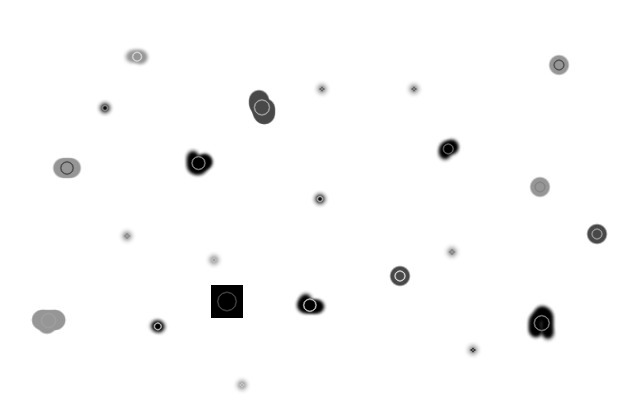

In [7]:
# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show keypoints
cv2_imshow(im_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()